In [2]:
#importando a biblioteca
import pandas as pd


In [32]:
#Leitura dos Arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")


In [33]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [34]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [37]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
#Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [10]:
#Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [12]:
#Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [13]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando Valores Faltantes**

In [14]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [21]:
df["Vendas"].mean()

122.61180089485438

In [16]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [22]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
57,Fortaleza,2019-01-01,129.07,1005,3
190,Salvador,2019-01-02,78.78,1035,3
23,Salvador,2019-01-01,193.20,1036,3
206,Natal,2019-01-02,151.45,1036,2
138,Fortaleza,2019-03-02,150.38,983,6
233,Salvador,2019-01-03,172.40,1036,2
180,Salvador,2019-01-02,116.63,1035,2
0,Recife,2019-01-01,162.61,981,1
122,Salvador,2019-03-02,13.27,1037,1
39,Recife,2019-01-01,143.58,981,3


In [23]:
#Substituindo valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [26]:
#Apagando linhas com valores nulos
df.dropna(inplace=True)

In [29]:
#Apagando as linhas com valores nulos com base em apenas 1 coluna
df.dropna(subset=["Vendas"],inplace=True)

In [30]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all",inplace=True)


**Criando colunas novas**

In [38]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])


In [39]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [40]:
df["Receita/Venda"] = df["Receita"] / df["Vendas"]

In [41]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [43]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [44]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [45]:
#nlargest Top 3 com base na coluna "Receita"
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [46]:
#nlargest Top 3 com piores receitas com base na coluna "Receita"
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [47]:
#Agrupamento por Cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [50]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**

In [51]:
#Transformando a coluna data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [52]:
#Verificando o tipo de dados de cada coluna
df.dtypes

Cidade            object
Data               int64
Vendas           float64
LojaID             int64
Qtde               int64
Receita          float64
Receita/Venda    float64
dtype: object

In [54]:
#Transformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [55]:
df.dtypes

Cidade                   object
Data             datetime64[ns]
Vendas                  float64
LojaID                    int64
Qtde                      int64
Receita                 float64
Receita/Venda           float64
dtype: object

In [56]:
#Agrupamento por ano dt=date_time
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [57]:
#Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [58]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda
60,Recife,2019-01-01,37.97,983,1,37.97,1.0,2019
55,Fortaleza,2019-01-01,214.73,1002,4,858.92,4.0,2019
24,Natal,2018-04-22,868.00,854,3,2604.00,3.0,2018
171,Salvador,2019-01-02,136.45,1035,3,409.35,3.0,2019
115,Recife,2019-03-02,12.23,981,3,36.69,3.0,2019


In [59]:
#Extraindo o mes e o dia
df["Mes_Venda"], df["Dia_Venda"] =(df["Data"].dt.month, df["Data"].dt.day)

In [64]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda
153,Salvador,2019-01-02,17.41,1035,2,34.82,2.0,2019,1,2
87,Aracaju,2018-01-01,116.71,1520,4,466.84,4.0,2018,1,1
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,9.0,2018,1,1
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019,1,1
16,Natal,2018-07-01,298.00,854,3,894.00,3.0,2018,7,1


In [61]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [65]:
#Calculando a diferença de dias
df["Diferença_Dias"] = df["Data"] - df["Data"].min()

In [66]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias
32,Recife,2019-01-01,15.93,982,7,111.51,7.0,2019,1,1,365 days
30,Recife,2019-01-01,12.35,980,5,61.75,5.0,2019,1,1,365 days
76,Natal,2019-02-20,364.00,853,2,728.00,2.0,2019,2,20,415 days
182,Salvador,2019-01-02,6.60,1037,2,13.20,2.0,2019,1,2,366 days
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,432 days


In [67]:
#Criando a coluna de Trimestre
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [70]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Trimestre_Venda
62,Fortaleza,2019-01-01,106.21,1005,6,637.26,6.0,2019,1,1,365 days,1
151,Salvador,2019-01-02,14.63,1035,1,14.63,1.0,2019,1,2,366 days,1
108,Natal,2019-01-02,11.72,1037,1,11.72,1.0,2019,1,2,366 days,1
3,Salvador,2019-02-10,176.34,1037,3,529.02,3.0,2019,2,10,405 days,1
58,Fortaleza,2019-01-01,38.90,1004,4,155.60,4.0,2019,1,1,365 days,1


In [74]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [78]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Trimestre_Venda
127,Salvador,2019-03-02,240.61,1035,3,721.83,3.0,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days,1
117,Fortaleza,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
29,Natal,2019-03-09,646.00,854,2,1292.00,2.0,2019,3,9,432 days,1
121,Salvador,2019-03-02,100.70,1037,3,302.10,3.0,2019,3,2,425 days,1
118,Salvador,2019-03-02,92.21,1035,2,184.42,2.0,2019,3,2,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,7.0,2019,3,2,425 days,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,6.0,2019,3,2,425 days,1
110,Recife,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
125,Recife,2019-03-02,37.60,983,4,150.40,4.0,2019,3,2,425 days,1


**Visualização de Dados**

In [ ]:
df["LojaID"].value_counts(ascending=False)

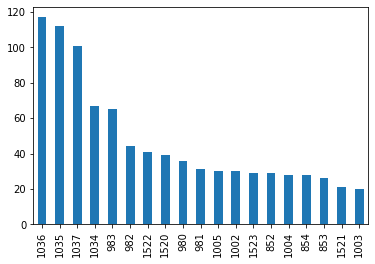

In [90]:
#Grafico de Barras
df["LojaID"].value_counts(ascending=False).plot.bar();

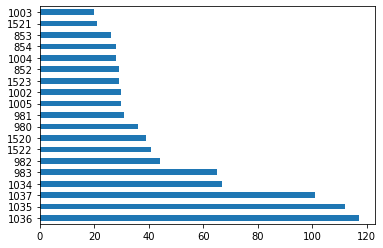

In [86]:
#Grafico de Barras
df["LojaID"].value_counts(ascending=False).plot.barh()

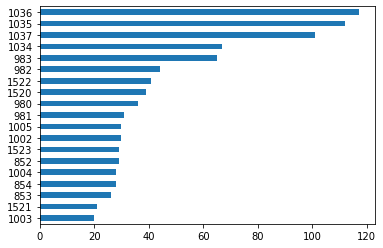

In [89]:
#Grafico de Barras ";"" para não mostrar linha em cima do grafico
df["LojaID"].value_counts(ascending=True).plot.barh();

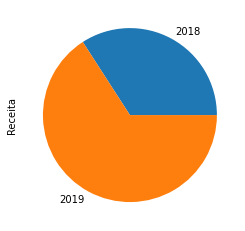

In [95]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [98]:
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

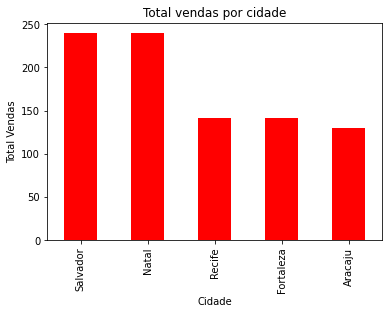

In [103]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [104]:
#Alterando o estilo
plt.style.use("ggplot")

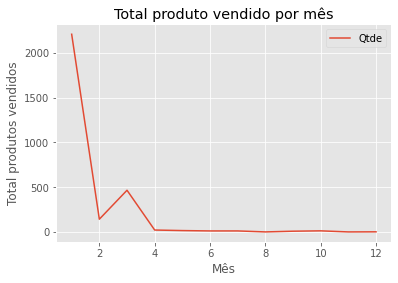

In [110]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title = "Total produto vendido por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

In [111]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [114]:
#Selecionando as vendas do ano de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

In [115]:
df_2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Venda,Ano_Venda,Mes_Venda,Dia_Venda,Diferença_Dias,Trimestre_Venda
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0,2019,1,2,366 days,1
31,Salvador,2019-01-01,202.25,1035,2,404.50,2.0,2019,1,1,365 days,1
202,Natal,2019-01-02,22.45,1036,1,22.45,1.0,2019,1,2,366 days,1
90,Fortaleza,2019-01-01,18.01,1005,2,36.02,2.0,2019,1,1,365 days,1
5,Recife,2019-01-01,13.59,980,3,40.77,3.0,2019,1,1,365 days,1


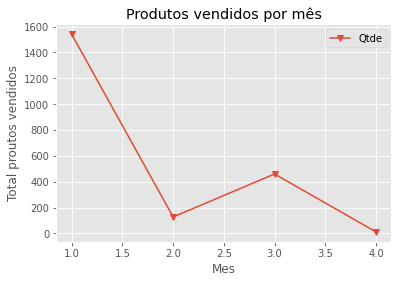

In [119]:
#Total produto vendido por mes
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v", title="Produtos vendidos por mês")
plt.xlabel("Mes")
plt.ylabel("Total proutos vendidos")
plt.legend();

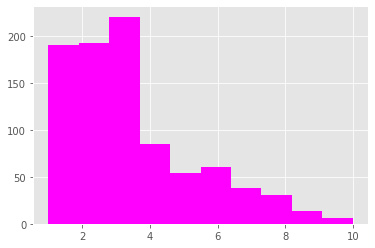

In [120]:
#Istograma
plt.hist(df["Qtde"], color="magenta");

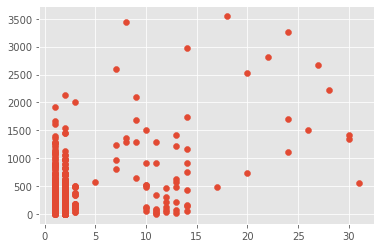

In [123]:
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

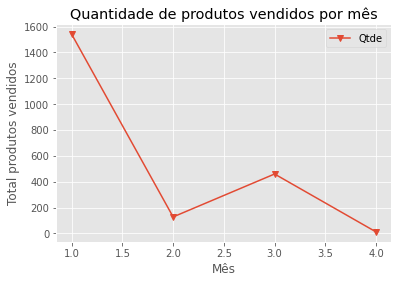

In [124]:
#Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("Grafico QTD x MES.png")

**E se a gente quiser saber o lucro por ano e por marca?**

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#upload de arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#criando nosso dataframe
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
#visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
#verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
#qual a receita total
df["Valor Venda"].sum()

5984606.1426

In [9]:
#qual o custo total
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [10]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
#custo total
round(df["Custo"].sum(),2)

2486783.05

In [13]:
#agora temos receita e custo e o total, podemos achar o lucro total
#vamos criar uma coluna de Lucro que será Receita - Custo
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [14]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [15]:
#custo lucro
round(df["Lucro"].sum(),2)

3497823.09

In [16]:
#criando uma coluna com total de dias para enviar o produto
df["Tempo_Envio"] = df["Data Venda"]- df["Data Envio"]

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,-20 days


**Agora quero saber a média do tempo de envio para cada marca, e para isso precisamos transformar a coluna tempo_envio em numérica**

In [24]:
#extraindo apenas os dias
df["Tempo_Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [25]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [28]:
#verificando o tipo da coluna Tempo_envio
df["Tempo_Envio"].dtype

dtype('int64')

In [29]:
#média do tempo de envio por marca
df.groupby("Marca")["Tempo_Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_Envio, dtype: float64

**Missing values**

In [30]:
#verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_Envio       0
dtype: int64

**E,se a gente quiser saber o lucro por ano e por marca?**


In [33]:
#vamos agrupar por ano e marca, quero o lucro por ano da marca, somando o lucro
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [32]:
pd.options.display.float_format = '{:20,.2f}'.format

In [35]:
#resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [36]:
#qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

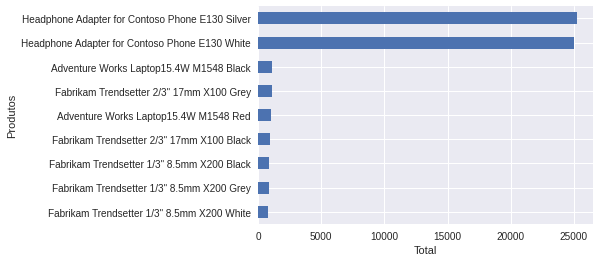

In [40]:
#gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh("Total de produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produtos");

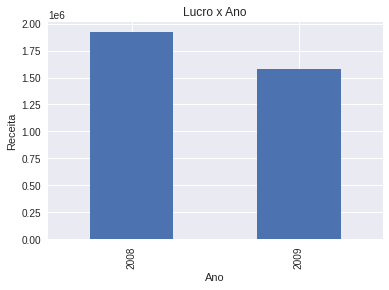

In [50]:
#Lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [52]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [59]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


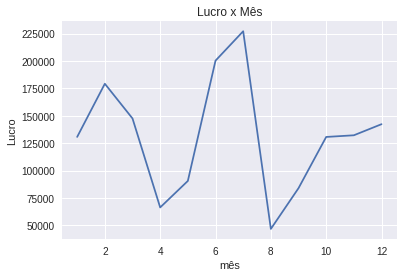

In [64]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title= "Lucro x Mês")
plt.xlabel("mês")
plt.ylabel("Lucro")
df_2009.head();

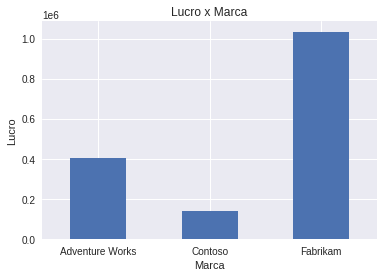

In [73]:
df_2009.groupby(df_2009["Marca"])["Lucro"].sum().plot.bar(title= "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); #os nomes no eixo x, ficam na horizontal

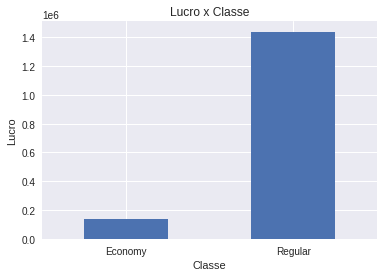

In [77]:
df_2009.groupby(df_2009["Classe"])["Lucro"].sum().plot.bar(title= "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); #os nomes no eixo x, ficam na horizontal

In [83]:
df["Tempo_Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_Envio, dtype: float64

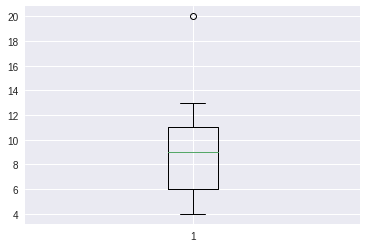

In [81]:
#grafico de boxplot
plt.boxplot(df["Tempo_Envio"]);

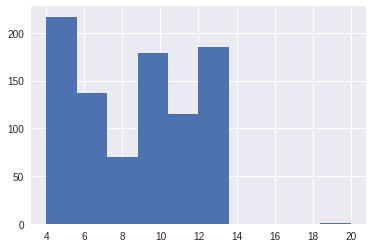

In [85]:
#histograma
plt.hist(df["Tempo_Envio"]);

In [88]:
#tempo minimo de envio
df["Tempo_Envio"].min()

4

In [89]:
#tempo maximo de envio
df["Tempo_Envio"].max()

20

In [91]:
#identificar o outlier
df[df["Tempo_Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo_Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [92]:
df.to_csv("df_vendas_novo.csv", index=False)